In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../course_notebooks/08-Linear-Regression-Models/Advertising.csv')
x=df.drop('sales',axis=1)
sales=df['sales']

<AxesSubplot:xlabel='sales'>

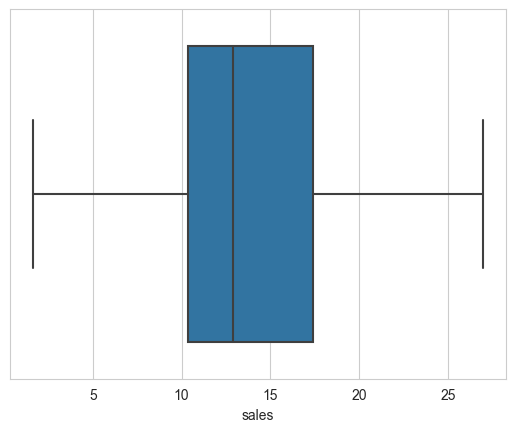

In [157]:
sns.boxplot(df,x='sales')

In [158]:
print(sales.describe())
q25,q50,q75 = np.percentile(sales,[25,50,75])
IQR = q75 - q25
lower_limit = q50 - 1.5 * IQR
print(lower_limit)
print(q25)
print(q75)

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64
2.3625000000000025
10.375
17.4


In [159]:
housing = pd.read_csv('../course_notebooks/DATA/Ames_Housing_Data.csv')
housing.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [160]:
housing.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

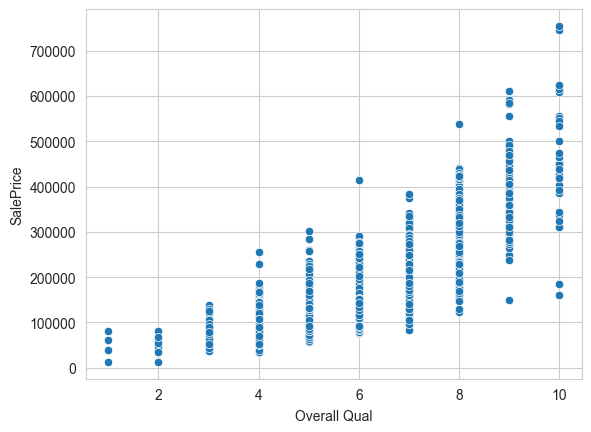

In [161]:
sns.scatterplot(housing,x='Overall Qual',y='SalePrice')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

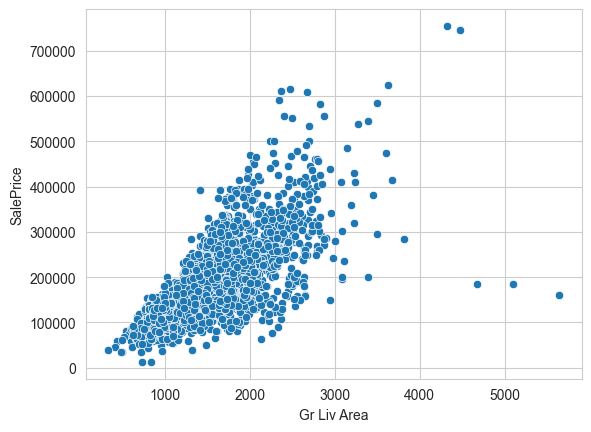

In [162]:
sns.scatterplot(housing,x='Gr Liv Area',y='SalePrice')

In [163]:
housing[(housing['Gr Liv Area'] > 4500) & (housing['SalePrice'] < 300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [164]:
drop_index = housing[(housing['Gr Liv Area'] > 4500) & (housing['SalePrice'] < 300000)].index
housing = housing.drop(drop_index,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

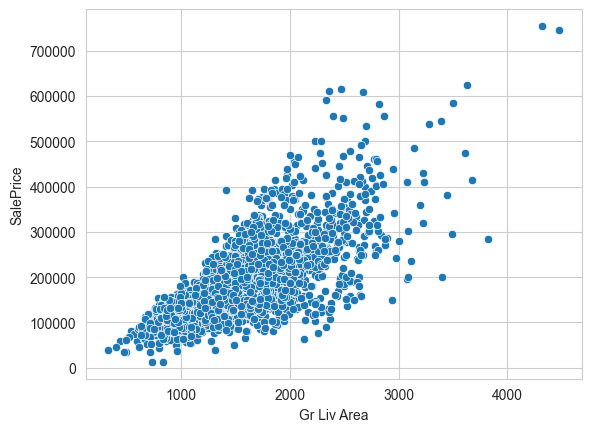

In [165]:
sns.scatterplot(housing,x='Gr Liv Area',y='SalePrice')

In [166]:
with open('../course_notebooks/DATA/Ames_Housing_Feature_Description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [167]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [168]:
housing=housing.drop('PID',axis=1)
len(housing.columns)

80

In [169]:
100 * housing.isnull().sum() / len(housing)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [170]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)
    return percent_nan

In [171]:
percent_nan = percent_missing(housing)
percent_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
BsmtFin SF 1       0.034165
Electrical         0.034165
dtype: float64

<AxesSubplot:>

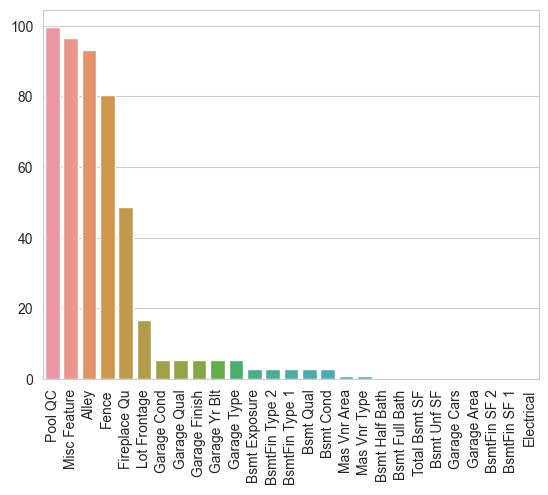

In [172]:
plt.xticks(rotation=90)
sns.barplot(x=percent_nan.index,y=percent_nan)

<AxesSubplot:>

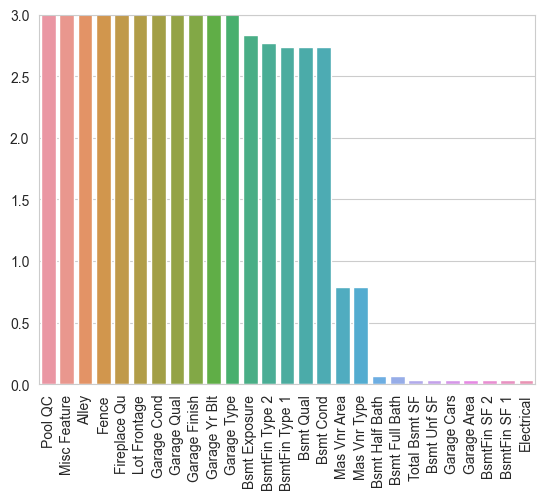

In [173]:
plt.xticks(rotation=90)
plt.ylim(0,3)
sns.barplot(x=percent_nan.index,y=percent_nan)

In [174]:
percent_nan[percent_nan < 1]

Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Electrical        0.034165
dtype: float64

In [175]:
housing[housing['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [176]:
housing[(housing['Electrical'].isnull()) | (housing['BsmtFin SF 1'].isnull()) | (housing['BsmtFin SF 2'].isnull()) | (housing['Garage Area'].isnull()) | (housing['Garage Area'].isnull()) | (housing['Garage Cars'].isnull()) | (housing['Bsmt Unf SF'].isnull()) | (housing['Total Bsmt SF'].isnull()) | (housing['Bsmt Full Bath'].isnull()) | (housing['Bsmt Half Bath'].isnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [177]:
housing = housing.dropna(axis=0,subset=['Electrical','Garage Area'])

In [178]:
percent_nan = percent_missing(housing)
percent_nan[percent_nan < 1]

Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
Bsmt Half Bath    0.068376
Bsmt Full Bath    0.068376
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Total Bsmt SF     0.034188
dtype: float64

In [179]:
housing[(housing['Bsmt Full Bath'].isnull()) | (housing['Bsmt Half Bath'].isnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [180]:
for col in housing.columns:
    if 'Bsmt' in col:
        print(col)

Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
BsmtFin Type 2
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Bsmt Full Bath
Bsmt Half Bath


In [181]:
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
housing[bsmt_num_cols] = housing[bsmt_num_cols].fillna(0)
bsmt_str_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
housing[bsmt_str_cols] = housing[bsmt_str_cols].fillna('None')

In [182]:
percent_nan = percent_missing(housing)
percent_nan[percent_nan < 1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

In [183]:
housing['Mas Vnr Type'] = housing['Mas Vnr Type'].fillna('None')
housing['Mas Vnr Area'] = housing['Mas Vnr Area'].fillna(0)

<AxesSubplot:>

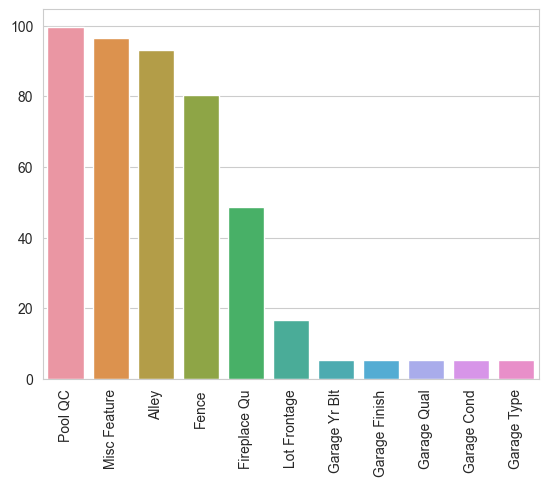

In [184]:
percent_nan = percent_missing(housing)
plt.xticks(rotation=90)
sns.barplot(x=percent_nan.index,y=percent_nan)

In [185]:
for col in housing.columns:
    if 'Garage' in col:
        print(col)

Garage Type
Garage Yr Blt
Garage Finish
Garage Cars
Garage Area
Garage Qual
Garage Cond


In [186]:
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
housing[gar_str_cols] = housing[gar_str_cols].fillna('None')

<AxesSubplot:>

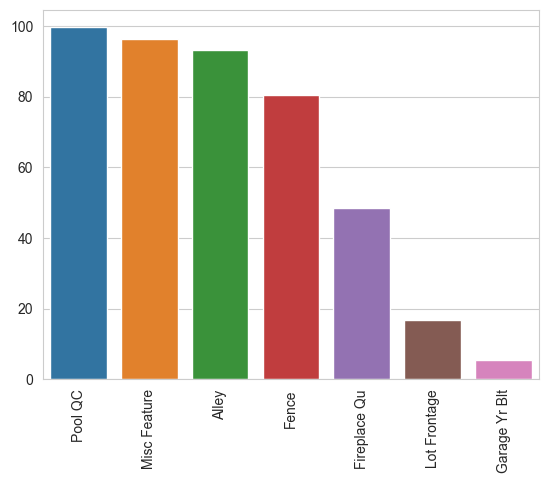

In [187]:
percent_nan = percent_missing(housing)
plt.xticks(rotation=90)
sns.barplot(x=percent_nan.index,y=percent_nan)

In [188]:
housing['Garage Yr Blt'] = housing['Garage Yr Blt'].fillna(0)

<AxesSubplot:>

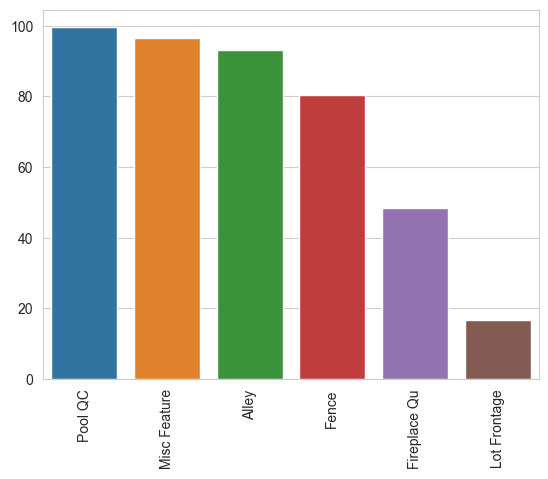

In [189]:
percent_nan = percent_missing(housing)
plt.xticks(rotation=90)
sns.barplot(x=percent_nan.index,y=percent_nan)

<AxesSubplot:>

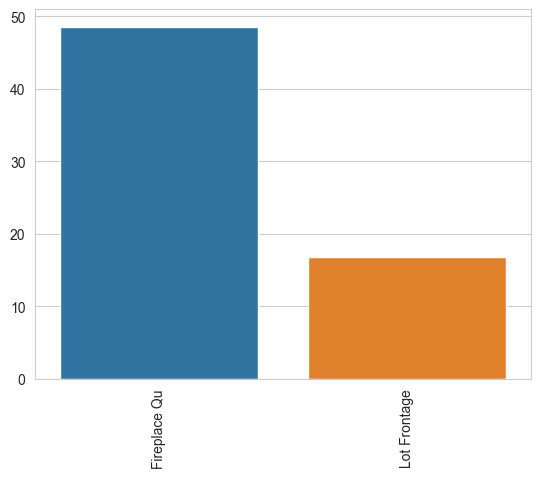

In [190]:
housing['Pool QC'] = housing['Pool QC'].fillna('No Pool')
housing = housing.drop(['Misc Feature','Alley','Fence'],axis=1)
percent_nan = percent_missing(housing)
plt.xticks(rotation=90)
sns.barplot(x=percent_nan.index,y=percent_nan)

In [191]:
housing['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [192]:
housing['Fireplace Qu'] = housing['Fireplace Qu'].fillna('None')

In [193]:
housing['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

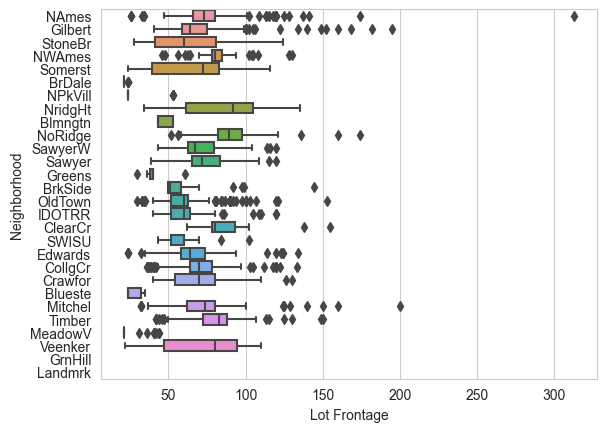

In [194]:
sns.boxplot(housing,x='Lot Frontage',y='Neighborhood',orient='h')

In [195]:
housing.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [198]:
housing['Lot Frontage'] = housing.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))
percent_missing(housing)

Lot Frontage    0.102564
dtype: float64

In [200]:
housing['Lot Frontage'] = housing['Lot Frontage'].fillna(0)
percent_missing(housing)

Series([], dtype: float64)

In [201]:
housing['MS SubClass'] = housing['MS SubClass'].apply(str)

In [202]:
housing.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Typ,Gd,Attchd,Fin,TA,TA,P,No Pool,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Typ,None,Attchd,Unf,TA,TA,Y,No Pool,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Typ,None,Attchd,Unf,TA,TA,Y,No Pool,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Typ,TA,Attchd,Fin,TA,TA,Y,No Pool,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Typ,TA,Attchd,Fin,TA,TA,Y,No Pool,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Typ,None,Detchd,Unf,TA,TA,Y,No Pool,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Typ,None,Attchd,Unf,TA,TA,Y,No Pool,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Typ,None,None,None,None,None,Y,No Pool,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,WD,Normal


In [203]:
object_datatypes = housing.select_dtypes(include='object')
numeric_datatypes = housing.select_dtypes(exclude='object')
housing_dummies = pd.get_dummies(object_datatypes,drop_first=True)
housing_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [207]:
final_housing = pd.concat([numeric_datatypes,housing_dummies],axis=1)
final_housing

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [208]:
final_housing.corr()['SalePrice'].sort_values(ascending=False)


SalePrice            1.000000
Overall Qual         0.802637
Gr Liv Area          0.727279
Total Bsmt SF        0.660983
Garage Cars          0.648488
                       ...   
Garage Finish_Unf   -0.422363
Bsmt Qual_TA        -0.453022
Fireplace Qu_None   -0.481740
Kitchen Qual_TA     -0.527461
Exter Qual_TA       -0.591459
Name: SalePrice, Length: 278, dtype: float64